In [12]:
import numpy    as np
import matplotlib.pyplot    as plt
from cycler    import cycler
import matplotlib    as mpl
import pandas    as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing    import StandardScaler
from sklearn    import svm
from sklearn.metrics import r2_score
import ternary
import numpy    as np
import matplotlib.pyplot    as plt
from cycler    import cycler
import matplotlib    as mpl
import pandas    as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing    import StandardScaler
from sklearn    import svm
from sklearn.metrics import r2_score

In [13]:
#    Get    the    data
df = pd.read_csv("sumbal.csv")
import random

KeyboardInterrupt: 

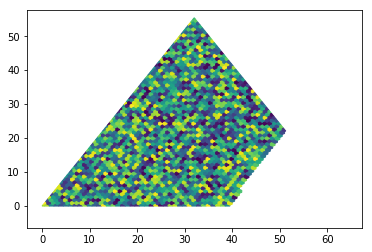

In [14]:
def generate_random_heatmap_data(scale=5):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i,j,k) in simplex_iterator(scale):
        d[(i,j)] = random.random()
    return d

scale = 64
d = generate_random_heatmap_data(scale)
figure, tax = ternary.figure(scale=scale)
tax.heatmap(d, style="h", use_rgba=False)
tax.boundary()
tax.set_title("Heatmap Test: Hexagonal")

<a list of 10 text.Text objects>

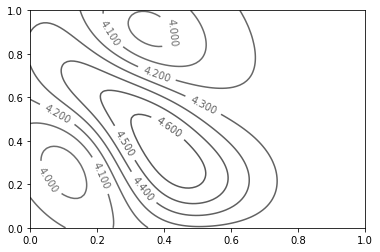

In [22]:
#Now plot manganese vs lithium
fig, ax = plt.subplots(1,1)
x_len, y_len = 100, 100
xs = np.linspace(0, 1, x_len)
ys = np.linspace(0, 1, y_len)
xi, yi = names

xm, ym = np.meshgrid(xs, ys)
#vm  = v * np.ones_like(xm)
r    = np.c_[xm.flatten(), ym.flatten()]
#    Compute    the    values    from    the    fit
c    = reg_avgv.predict(r).reshape(x_len, y_len)
#    Make    a    contour    map

cmap  = ax.contour(xs,    ys,    c,    vmin=0,    vmax=7,    cmap='gray_r')
plt.clabel(cmap,    inline=1,    fontsize=10)
#    Make    a    value    map
# pmap    = ax.pcolormesh(xs,    ys,    c,    shading='gouraud',  vmin=4.05,    vmax=4.75,    cmap='viridis')
# #    Plot    the    experimental    points
# ax.plot('Manganese',    'Nickel',    'o',    color=data['color'].iloc[0],
#                                                                 data=data.iloc[0],    mec='k',    mew=0.5,    label=label)
# ax.set_ylabel(f'{yi}')
# ax.set_xlabel(f'{xi}')
# ax.set_title(f'Ternary to-be')
# plt.tight_layout()
# #plt.colorbar(pmap,    ax=ax,    fraction=0.15)
# #plt.plot([0, 1], [1, 0],    ls="--", c='r')
# plt.minorticks_on()

TypeError: heatmap() got an unexpected keyword argument 'shading'

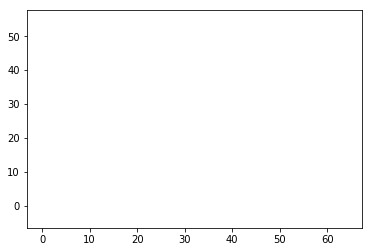

In [42]:
import math
from matplotlib import pyplot as plt
import ternary

def color_point(x, y, z, scale):
    w = 255
    x_color = x * w / float(scale)
    y_color = y * w / float(scale)
    z_color = z * w / float(scale)
    r = math.fabs(w - y_color) / w
    g = math.fabs(w - x_color) / w
    b = math.fabs(w - z_color) / w
    return (r, g, b, 1.)


def generate_heatmap_data(scale=5):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i, j, k) in simplex_iterator(scale):
        d[(i, j, k)] = color_point(i, j, k, scale)
    return d


scale = 64
data = generate_heatmap_data(scale)
# print(data)
data = {(0, 0, 64): (1.0, 1.0, 0.0, 1.0), (0, 1, 63): (0.984375, 1.0, 0.015625, 1.0), (0, 2, 62): (0.96875, 1.0, 0.03125, 1.0)}
figure, tax = ternary.figure(scale=scale)
tax.heatmap(data, style="hexagonal", shading='gouraud', use_rgba=True)
tax.boundary()
tax.set_title("RGBA Heatmap")
plt.show()

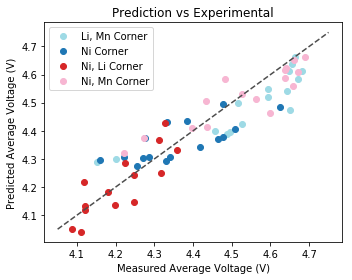

RuntimeError: Error in qhull Delaunay triangulation calculation: singular input data (exitcode=2); use python verbose option (-v) to see original qhull error.

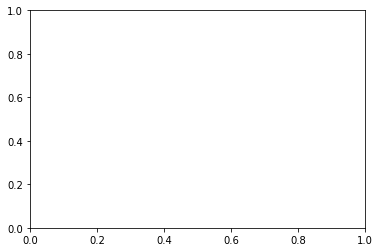

In [53]:
import numpy    as np
import matplotlib.pyplot    as plt
from cycler    import cycler
import matplotlib    as mpl
import pandas    as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing    import StandardScaler
from sklearn    import svm
from sklearn.metrics import r2_score



# Get the data
df = pd.read_csv("test2ML_avgv.csv")
#[Optional]    Add    color    labels    to    the    data - 3rd parameter is number of labels
colors = plt.cm.tab20(np.linspace(0, 1, 4)[0:len(df.label.unique())])
color_dic = {label: color for label, color in zip(df.label.unique(), colors)}
df['color'] = df.label.map(color_dic)

### Machine Learning Fit
# Make a list of variables for machine learning
names = ('Manganese', 'Nickel')
variables = df.loc[:, names]
# Define a Pipeline that scales the data and applies the model
reg_avgv = Pipeline([('scl',    StandardScaler()), ('clf',    svm.SVR(kernel='rbf', gamma=0.65))])
# Fit the variables to the PCE
reg_avgv.fit(variables, df.avgv)
# Get the predicted average voltage from the model and save it to the DataFrame
df['avgv_pred_svm'] = reg_avgv.predict(variables)
# Make a plot of the real values vs the predicted
# Increase gamma in the pipeline until the data just starts on to lay
# on the line. If gamma is too high the data can be over fit
fig, ax1 = plt.subplots(1,    1,    clear=True, num='avgv_pred', figsize=(5,    4))
ax1.set_title('Prediction vs Experimental')

for label, data in df.groupby('label'):
    plt.plot('avgv', 'avgv_pred_svm', 'o', color=data['color'].iloc[0], data=data, label=label)
    
plt.legend()
plt.autoscale(enable=True)
plt.plot([4.05, 4.75], [4.05, 4.75],    ls="--",    c=".3")
ax1.set_ylabel('Predicted Average Voltage (V)')
ax1.set_xlabel('Measured Average Voltage (V)')
plt.tight_layout()
plt.show()
plt.close()

# #r_sq=r2_score('avgv', p(x))

#Now plot manganese vs lithium
fig, ax = plt.subplots(1,1)
x_len, y_len = 100, 100
xs = np.linspace(0, 1, x_len)
ys = np.linspace(0, 1, y_len)
xi, yi = names

xm, ym = np.meshgrid(xs, ys)
#vm  = v * np.ones_like(xm)
r = np.c_[xm.flatten(), ym.flatten()]
# Compute the values from the fit
c = reg_avgv.predict(r).reshape(x_len, y_len)
# Make a contour map

# translate the data to cartesian corrds
_xs = 0.5 * ( 2.*(1-xs) )
_ys = 0.5*np.sqrt(3) * (1-xs-ys)
# create a triangulation out of these points
T = tri.Triangulation(_xs,_ys)

# plot the contour
plt.tricontourf(_xs,_ys,T.triangles,c)

cmap  = ax.contour(xs, ys, c, vmin=0, vmax=7, cmap='gray_r')
plt.clabel(cmap,    inline=1,    fontsize=10)

# Make a value map
pmap = ax.pcolormesh(xs, ys, c, shading='gouraud', vmin=4.05, vmax=4.75, cmap='viridis')

# Plot the experimental points
ax.plot('Manganese', 'Nickel', 'o', color=data['color'].iloc[0], data=data.iloc[0], mec='k', mew=0.5, label=label)
ax.set_ylabel(f'{yi}')
ax.set_xlabel(f'{xi}')
ax.set_title(f'Ternary to-be')
plt.tight_layout()
# plt.colorbar(pmap, ax=ax, fraction=0.15)
# plt.plot([0, 1], [1, 0], ls="--", c='r')
plt.minorticks_on()
plt.tick_params(axis='both', which='both', grid_color='k', grid_alpha=0.15)
# plt.grid(b=True, which='both', axis='both', linestyle='--')
plt.show()

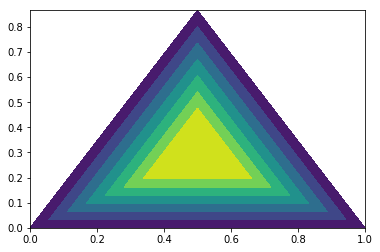

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri




# first load some data:  format x1,x2,x3,value
test_data = np.array([[0,0,1,0],
                      [0,1,0,0],
                      [1,0,0,0],
                      [0.25,0.25,0.5,1],
                      [0.25,0.5,0.25,1],
                      [0.5,0.25,0.25,1]])

# barycentric coords: (a,b,c)
a=test_data[:,0]
b=test_data[:,1]
c=test_data[:,2]

# values is stored in the last column
v = test_data[:,-1]

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5*np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
plt.tricontourf(x,y,T.triangles,v)